In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Stroke Preduction Model
``Here in this model you will be analyse stroke prediction ``

# Contents
<ul>
    <li>Import and first glance  </li>
<li>Data Cleansing   </li>
<li>Numerical Features  </ li>
<li>Categorical Features  </li>
<li>Target  </li>
<li>Build Model </li>
<li>Evaluate on Training Data </li>
<li>Evaluate on Test Set </li>

<img src='https://media3.giphy.com/media/xT5LMBk9CIQXji0wNy/giphy.gif'>

# Packages

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Reading the file

In [ ]:
df=pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

``Checking the shape of dataset``

In [ ]:
#to check shape
df.shape


``Contains 5110 rows and 12 columns``

In [ ]:
#colums
print(df.columns.tolist())

# Cleaning of data

In [ ]:
df.info()

In [ ]:


#it contains total of 12 columns

In [ ]:
df.bmi.isnull().value_counts()


``It states that it has 201 null values``

In [ ]:
df.bmi=df.bmi.fillna(-99)

``Filling out the null value``

In [ ]:
#here make a target variable so that we can use easily
df["target"]=df.stroke
df=df.drop(["stroke"],axis=1) #removing stroke from here

In [ ]:
df.target

# Data Processing

# Taking main features of the dataset

In [ ]:
features=["age","avg_glucose_level","bmi"] #selecting the parameters that we use

In [ ]:
df[features].describe(percentiles=[0.1,0.2,0.3,0.4])

In [ ]:
#plotting graph

for f in features:
    df[f].plot(kind="hist")
    plt.title(f)
    plt.show()

In [ ]:
df.plot(kind='scatter',x='age',y='avg_glucose_level',color='red')
plt.show()


In [ ]:
df.plot(kind='scatter',x='bmi',y='avg_glucose_level',color='red')
plt.show()


In [ ]:
df.plot(kind='scatter',x='age',y='bmi',color='red')
plt.show()


In [ ]:
sns.pairplot(df[features])


In [ ]:
spearman=df[features].corr(method="spearman")
fig=plt.figure(figsize=(7,5))
plt.show()

# Categorial features

In [ ]:
features_cat=['gender','hypertension','heart_disease','ever_married',
                'work_type','Residence_type','smoking_status']

In [ ]:
for f in features_cat:
    df[f].value_counts().plot(kind='bar')
    plt.title(f,size=20)
    plt.grid()
    sns.set_theme(style='darkgrid')
    plt.show()

In [ ]:
target_count=df.target.value_counts()
print(target_count)
print("Percentage of stroke[1]",np.round(100*target_count[1]/target_count.sum(),2),"%")

In [ ]:
target_count.plot(kind="bar")
plt.title("Stroke")
plt.grid()
plt.show()

``It shows Percentage of stroke[1] 4.87 ``

# Plotting the stroke

# Stroke vs numarical features

<img src='https://media0.giphy.com/media/KVjEHrBiHWkqFB4MUq/giphy.gif'>

In [ ]:
sns.catplot(y='target',x='gender',data=df,kind='bar')
plt.title('Target vs Gender',size=20)
plt.grid()


``Males are more prone to heart attack``

<img src="https://media.tenor.com/images/b46906bbf29dd8a0bf85231ef71998e1/tenor.gif">

``People having more hypertenssion are more prone to stroke``

In [ ]:
sns.catplot(y='target',x='hypertension',data=df,kind='bar')
plt.title('Target vs Hypertension',size=20)
plt.grid()


<img src='https://www.verywellhealth.com/thmb/XjFwBrJx7bRalsHOyLK2b5aIOcg=/500x350/filters:no_upscale():max_bytes(150000):strip_icc()/heart-health-5-5a78affa04d1cf00377bcdfb.gif'>

In [ ]:
sns.catplot(y='target',x='heart_disease',data=df,kind='bar')
plt.title('Target vs Heart disease',size=20)
plt.grid()


``People with heart disease are more prone to stroke``

<img src='https://c.tenor.com/K6xMm3nxBg4AAAAC/marriage-marry.gif'>

In [ ]:
sns.catplot(y='target',x='ever_married',data=df,kind='bar')
plt.title('Target vs Marriage',size=20)
plt.grid()


``Married people are more prone to heart attack``

<img src='https://cdn.dribbble.com/users/3050354/screenshots/14646894/media/1f31948afd5401c44d4bae934f07641a.gif'>

In [ ]:
sns.catplot(x='target',y='work_type',data=df,kind='bar')
plt.title('Target vs work type',size=20)
plt.grid()


``Self employed are more prone than any other work type people``

<img src="https://i.gifer.com/8OMe.gif">

In [ ]:
sns.catplot(y='target',x='Residence_type',data=df,kind='bar')
plt.title('Target vs Residence type',size=20)
plt.grid()


``Urban papulation are getting more stroke``

<img src='https://i.pinimg.com/originals/31/3f/09/313f0907a1eff4ffee6ccb427300c59a.gif'>

In [ ]:
sns.catplot(x='target',y='smoking_status',data=df,kind='bar')
plt.title('Target vs smoking status',size=20)
plt.grid()


``People who are formerly smoking are getting the most strokes``

In [ ]:
df["age_bin"]=pd.qcut(df["age"],q=10,precision=1)
df["avg_glucose_level_bin"]=pd.qcut(df["avg_glucose_level"],q=10,precision=1)
df["bmi_bin"]=pd.cut(df["bmi"], [-100,10,20,25,30,35,40,50,100])

In [ ]:
#for ever married check cross table
ctab = pd.crosstab(df.ever_married, df.target)
ctab

In [ ]:
#normalise each row
(ctab.transpose()/ctab.sum(axis=1)).transpose()

# Build Model


In [ ]:
#selecting predictors
predictors=features+features_cat
print("No of Predictors",len(predictors))
print(predictors)

``There are a total of 10 predictors which are used to analyse stroke ``

# BMI

In [ ]:
print(df.bmi.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="bmi",color='black')
plt.show()

# Hypertension

In [ ]:
print(df.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="hypertension")
plt.show()

``shows 4612 people have hypertension``

# Marriage status

In [ ]:
print(df.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="ever_married")
plt.show()

``3353 people are married and 1757 are not married``

In [ ]:
print(df.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="work_type")
plt.show()

``Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22``

# Residence type

In [ ]:
print(df.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="Residence_type")
plt.show()

``Shows that
Urban    2596
Rural    2514``

# Smoking status

In [ ]:
print(df.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax=sns.countplot(data=df,x="smoking_status")
plt.show()

``
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789``

# Distribution Plot

**Avg Glucose Level**

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.distplot(df.avg_glucose_level,label="Avg_glucose_level")
plt.legend()

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.distplot(df.bmi,label="BMI",color="green")
plt.legend()

In [ ]:
df.target

# No target vs target on BMI

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df[df["target"]==0]["bmi"],color="red")
sns.distplot(df[df["target"]==1]["bmi"],color="green")
plt.title("No stroke vs stroke by BMI",size=20)
plt.xlim()
plt.show()

`` Shows that people with with bmi around 25 suffered more stroke``

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df[df["target"]==0]["avg_glucose_level"],color="red")
sns.distplot(df[df["target"]==1]["avg_glucose_level"],color="green")
plt.title("No stroke vs stroke by Avg Glucose Level",size=20)
plt.xlim()
plt.show()

``Shows that people having average glucose level 100 suffer heart stroke the most``

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df[df["target"]==0]["age"],color="red")
sns.distplot(df[df["target"]==1]["age"],color="green")
plt.title("No stroke vs stroke by age",size=20)
plt.xlim()
plt.show()

``Shows that people with age  more than 50 suffer more heart stroke``

# Scatter plot

**Age VS Bmi**

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

``From the above graph we can see that people with BMI greater than 25 are fat``

# Age vs Average glucose level

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

``From the above graph we can see that people with glucose greater than 150 are less``


# Voilen Plot

In [ ]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'target', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'target', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'target', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'target', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'target', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'target', data = df)
plt.show()

# Pair Plot

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

# Data Preprocessing

In [ ]:
df['gender'].unique()

In [ ]:
df['smoking_status'].unique()

In [ ]:
df['work_type'].unique()

In [ ]:
ohe=OneHotEncoder()

In [ ]:
df['gender']=pd.Categorical(df['gender'])
dfdummiesgender=pd.get_dummies(df['gender'],prefix='gender_encoded')
dfdummiesgender

In [ ]:
df['smoking_status']=pd.Categorical(df['smoking_status'])
dfdummiessmoke=pd.get_dummies(df['smoking_status'],prefix='gender_encoded')
dfdummiessmoke

In [ ]:
df['work_type']=pd.Categorical(df['work_type'])
dfdummieswork=pd.get_dummies(df['work_type'],prefix='gender_encoded')
dfdummieswork

In [ ]:
df.drop('gender',axis=1,inplace=True)
df.drop('smoking_status',axis=1,inplace=True)
df.drop('work_type',axis=1,inplace=True)

In [ ]:
df=pd.concat([df,dfdummiesgender],axis=1)
df=pd.concat([df,dfdummiessmoke],axis=1)
df=pd.concat([df,dfdummieswork],axis=1)
df

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

In [ ]:
y = df['target']
x= df.drop(['target'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)
print('train data-',len(x_train))
print('test data-',len(x_test))
print('Length of x-',len(x))

# Logistic  Regression

# Conclusions

<ul>
<li>From the above graph we can see that people with glucose greater than 150 are less</li>
    <li>From the above graph we can see that people with BMI greater than 25 are fat</li>
    <li>Shows that people with age  more than 50 suffer more heart stroke</li>
    <li>Shows that people with age  more than 50 suffer more heart stroke</li>
<li>People having more hypertenssion are more prone to stroke</li>
    <li>Males are more prone to heart attack</li>

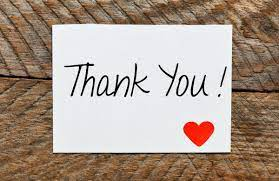